In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df=pd.read_csv('EcomerceData.csv',encoding='latin-1')

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data overview

In [9]:
def dataoverview(df):
    print('Data Overview\n')
    print('Number of records:\n',df.shape[0])
    print('Number of features:\n',df.shape[1])
    print('Feature name:\n',df.columns.to_list())
    print('Discriptive view on the data:\n',df.describe())
    print(df.info())
    if df.isnull().sum().sum()==0:
        print('Number of missing values:\n',df.isnull().sum().sum())
    else:
        print('Number of missing values in each columns:\n',df.isnull().sum())
    print('number of unique values:\n',df.nunique())

In [10]:
dataoverview(df)

Data Overview

Number of records:
 541909
Number of features:
 8
Feature name:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Discriptive view on the data:
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object

# Data cleaning and preprocessing

In [11]:
# Filling missing values in the CustomerID with unknown/ annonimus data

df['CustomerID'].fillna('Unknown',inplace=True)

In [12]:
# Filling missing values in the Description with unknown/ annonimus dat

df['Description'].fillna('Unknown',inplace=True)

In [13]:
# Changing invoicedate column values datatype into datetime object

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [14]:
# There we can see a huge differnce in the descriptive analysis from the data overview 
# in the max value when compiring with the 75% of the data
# Checking the outlier 

df[df['Quantity']>4000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
74614,542504,37413,Unknown,5568,2011-01-28 12:03:00,0.00,Unknown,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


From my observation i found that even if the quantity is high there is a unit price given and the product description is clear 
so we should check for where ever we have zero in the unity price

In [15]:
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Unknown,56,2010-12-01 11:52:00,0.0,Unknown,United Kingdom
1970,536545,21134,Unknown,1,2010-12-01 14:32:00,0.0,Unknown,United Kingdom
1971,536546,22145,Unknown,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1972,536547,37509,Unknown,1,2010-12-01 14:33:00,0.0,Unknown,United Kingdom
1987,536549,85226A,Unknown,1,2010-12-01 14:34:00,0.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,Unknown,27,2011-12-08 10:33:00,0.0,Unknown,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,Unknown,United Kingdom
538554,581408,85175,Unknown,20,2011-12-08 14:06:00,0.0,Unknown,United Kingdom


We can remove those rows having the unitprice is zero

In [16]:
df=df[df['UnitPrice']!=0]

Checking what is the problem with the unit price is more high

In [17]:
df[df['UnitPrice']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,Unknown,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,Unknown,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,Unknown,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,Unknown,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,Unknown,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,Unknown,United Kingdom
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,Unknown,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,Unknown,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,Unknown,United Kingdom


We can remove this 10 rows this seems to be an outlier for us

In [18]:
df=df[df['UnitPrice']<10000]

In [19]:
df[df['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


In [20]:
df=df[df['Quantity']<10000]

In [21]:
# There are negative values in the Quantity and Unitprice. Need to identify wheather it is useful 
# Spliting the data based on this negative condition

df_part1=df[df['Quantity']<0]

In [22]:
df_part1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [23]:
df_part1.shape

(9280, 8)

In [24]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,Unknown,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,Unknown,United Kingdom


We can see that the negative unit price has only two values we can simply remove that

In [25]:
df=df[df['UnitPrice']>=0]

Now we can create the second part for the df

In [26]:
df_part2=df[df['Quantity']>=0]

In [27]:
df_part2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df_part2.shape

(530100, 8)

## Observation

Now we have two parts of df 
df_part1 - contain data with negative values in the quantity
df_part2 - conatin data with non negative values in the quantity 

# EDA 

### Start with df_part2 - data with non negative values in quantity 

## Data overview

In [29]:
dataoverview(df_part2)

Data Overview

Number of records:
 530100
Number of features:
 8
Feature name:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Discriptive view on the data:
             Quantity                    InvoiceDate      UnitPrice
count  530100.000000                         530100  530100.000000
mean       10.249319  2011-07-04 20:16:34.616185856       3.861236
min         1.000000            2010-12-01 08:26:00       0.001000
25%         1.000000            2011-03-28 12:22:00       1.250000
50%         3.000000            2011-07-20 12:58:00       2.080000
75%        10.000000            2011-10-19 12:39:00       4.130000
max      4800.000000            2011-12-09 12:50:00    8142.750000
std        37.793615                            NaN      26.712399
<class 'pandas.core.frame.DataFrame'>
Index: 530100 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       ------

### Top selling product 

In [34]:
# Top 10 most sold products
top_products = df_part2.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
PACK OF 12 LONDON TISSUES             26135
PACK OF 60 PINK PAISLEY CAKE CASES    24854
Name: Quantity, dtype: int64


### Sales by Country:

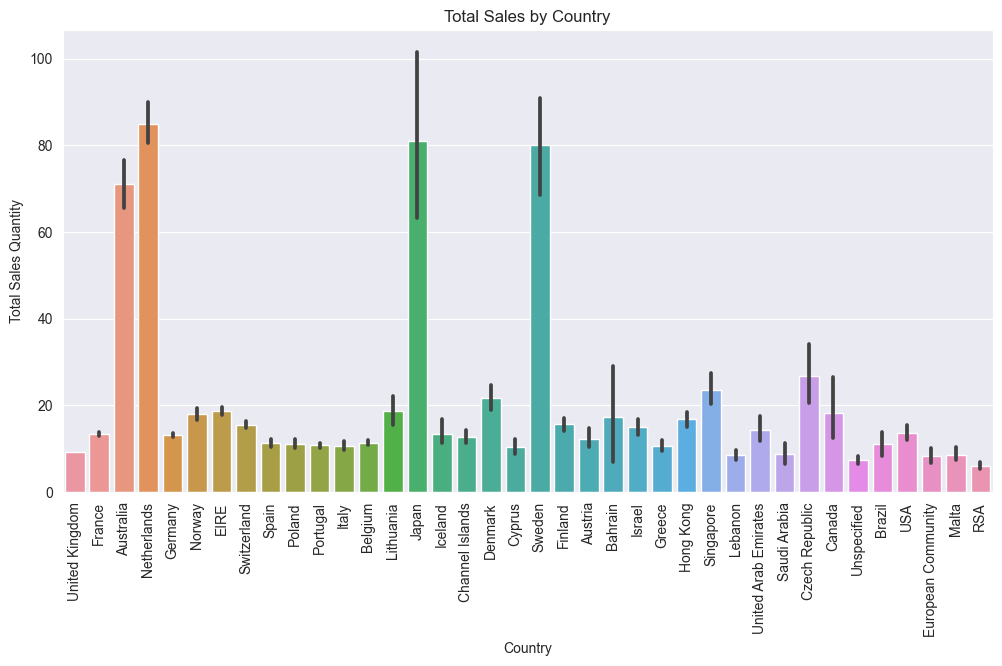

In [35]:
# Sales by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Quantity', data=df_part2)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales by Country')
plt.show()

### Invoice Frequency:

In [36]:
# Count unique InvoiceNo for each customer
invoice_count = df_part2.groupby('CustomerID')['InvoiceNo'].nunique()
print(invoice_count.head())

CustomerID
12347.0    7
12348.0    4
12349.0    1
12350.0    1
12352.0    8
Name: InvoiceNo, dtype: int64


### Monthly Sales:

C:\Users\jonit.j\AppData\Local\Temp\ipykernel_19332\2302026371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part2['Month'] = df_part2['InvoiceDate'].dt.to_period('M')


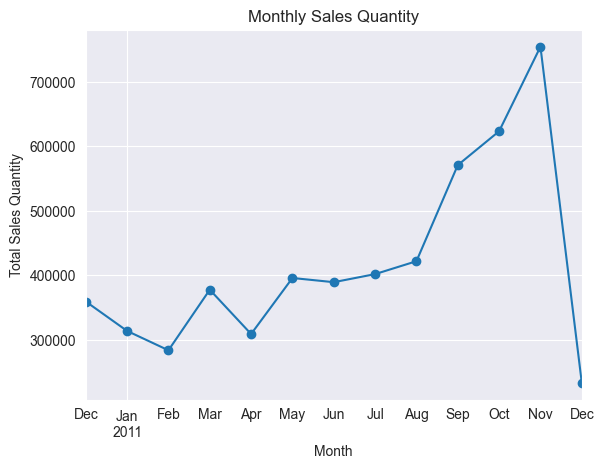

In [37]:
# Extract month from InvoiceDate and create a monthly sales plot
df_part2['Month'] = df_part2['InvoiceDate'].dt.to_period('M')
monthly_sales = df_part2.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Quantity')
plt.show()

### Customer Distribution:

In [38]:
# Distribution of the number of customers by country
customer_count_by_country = df_part2.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(customer_count_by_country)

Country
United Kingdom          3920
Germany                   94
France                    88
Spain                     30
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     4
EIRE                       4
USA                        4
Greece                     4
Canada                     4
Bahrain                    3
Malta                      2
United Arab Emirates       2
Singapore                  1
Brazil                     1
Saudi Arabia               1
Lebanon                    1
RSA                        1
Hong Kong                  1
Icelan